In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print('Setup complete')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-world-cup-attendance-19302022/FIFA World Cup Award.csv
/kaggle/input/fifa-world-cup-attendance-19302022/FIFA World Cup Attendance.csv
/kaggle/input/fifa-world-cup-attendance-19302022/List of FIFA World Cup finals.csv
/kaggle/input/fifa-world-cup-attendance-19302022/Teams reaching the top four.csv
Setup complete


An announcement made 11 years ago, "The winner to organize 2022 FIFA World Cup is Qatar", has been a source of controversies over the last decade. Outrages and proposed boycotts stemming from corruptions, human rights violation and the movement of the tournament from the usual summer season to the winter. An analysis will be performed to identify if any of the previous factors had an impact on the attendance of Qatar 2022 in comparisons to other FIFA World Cup tournments


In [2]:
# importing data

fifa_filepath = "../input/fifa-world-cup-attendance-19302022/FIFA World Cup Attendance.csv"

fifa_data = pd.read_csv(fifa_filepath, index_col='Year')

fifa_data

,Unnamed: 0,Hosts,Total_Attendance,Matches,Average_Attendance,Number,Venue,Game(s)
Year,,,,,,,,
1930,0,Uruguay,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1934,1,Italy,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"
1938,2,France,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final"
1950,3,Brazil,1045246,22,47511,"173,850[86]","Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match"
1954,4,Switzerland,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final"
1958,5,Sweden,819810,35,23423,50928,"Ullevi Stadium, Gothenburg","Brazil 2–0 Soviet Union, Group stage"
1962,6,Chile,893172,32,27912,68679,"Estadio Nacional, Santiago","Brazil 4–2 Chile, Semi-final"
1966,7,England,1563135,32,48848,98270,"Wembley Stadium, London","England 4–2 West Germany, Final"
1970,8,Mexico,1603975,32,50124,108192,"Estadio Azteca, Mexico City","Mexico 1–0 Belgium, Group stage"


In [3]:
# cleaning up dataset

fifa_data

# removing last row from table
fifa_data.drop(fifa_data.tail(1).index,inplace=True)

fifa_data.tail()

,Unnamed: 0,Hosts,Total_Attendance,Matches,Average_Attendance,Number,Venue,Game(s)
Year,,,,,,,,
2006,17,Germany,3359439,64,52491,72000,"Olympiastadion, Berlin","Germany 1–1 (4–2p) Argentina, Quarter-final"
2010,18,South Africa,3178856,64,49670,84490,"Soccer City, Johannesburg","Spain 1–0 Netherlands, Final"
2014,19,Brazil,3429873,64,53592,74738,"Maracanã Stadium, Rio de Janeiro","Germany 1–0 Argentina, Final"
2018,20,Russia,3031768,64,47371,78011,"Luzhniki Stadium, Moscow","France 4–2 Croatia, Final"
2022,21,Qatar,3404252,64,53191,88966,"Lusail Stadium, Qatar","Argentina 3–3 (4–2p) France, Final"


Text(0, 0.5, 'Total Attendance in Millions')

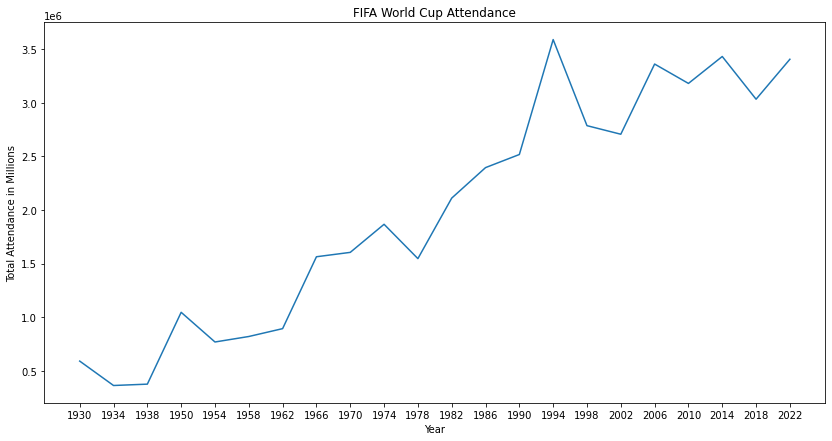

In [4]:
# line plot data viz

# setting up figure
plt.figure(figsize=(14,7))
# title
plt.title("FIFA World Cup Attendance")
# line plot showing the fifa world cup attendance
sns.lineplot(data=fifa_data['Total_Attendance'])
# axis labels
plt.ylabel('Total Attendance in Millions')

Text(0, 0.5, 'Total Attendance in Millions')

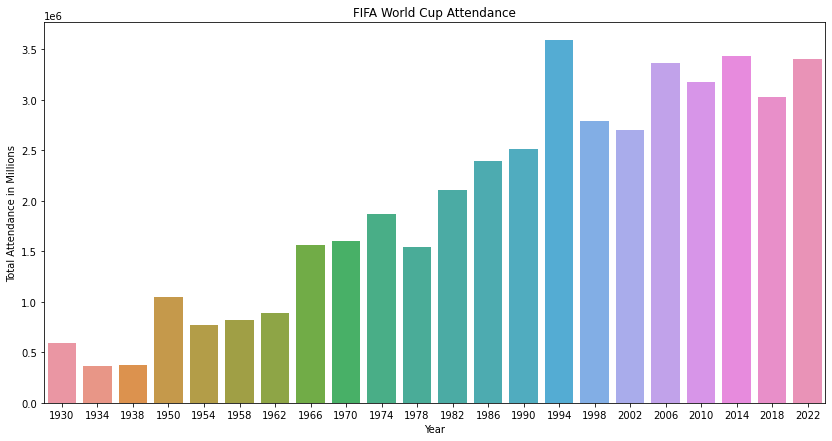

In [5]:
# bar plot data viz

# setting up figure
plt.figure(figsize=(14,7))
# title
plt.title("FIFA World Cup Attendance")
# bar plot showing the fifa world cup attendance
sns.barplot(x=fifa_data.index,y=fifa_data['Total_Attendance'])
# axis labels
plt.ylabel('Total Attendance in Millions')

In [6]:
# previous 2 world cup attendance difference 
wc2018=3031768
wc2022=3404252
diff=wc2022-wc2018
print(diff)

372484


The total attendance of Qatar 2022 is in line with the last four World Cup tournments. Interestingly enough, there was an increase of almost 400,000 from the previous tournemnt, Russia 2018, a host nation which was also subjected to various controversies and serves as a good comparison for this analysis. A general overview depicts it as the third most attended tournament in its history, revealing a lack of impact of the aforementioned factors.

Further analysis into aspects such as tv/stream viewership numbers will be needed to get a full scope on the impact of Qatar 2022 controversies.